In [88]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

stock_data = pd.read_csv('google.csv')
stock_data.head()

close_prices = stock_data['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared
r2 = r2_score(y_test, predictions)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared:', r2)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_23 (LSTM)              (None, 100)               80400     
                                                                 
 dense_22 (Dense)            (None, 25)                2525      
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 31s 28ms/step - loss: 8.5570e-04
Epoch 2/3
947/947 [==============================] - 30s 32

C:\Users\Gifty Aiyegbeni\AppData\Local\Temp\ipykernel_12020\2554567884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


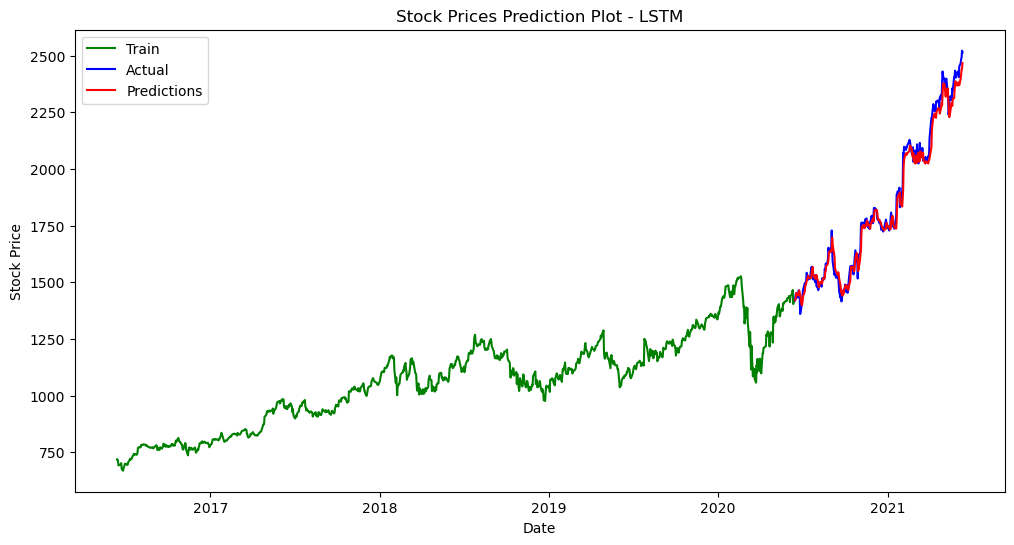

In [80]:
stock_data['date'] = pd.to_datetime(stock_data.date, format='%Y-%m-%d %H:%M:%S')
stock_data.index = stock_data['date']
data = stock_data.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(12, 6))
plt.title('Stock Prices Prediction Plot - LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(train, color='green', label='Train')
plt.plot(validation['close'], color='blue', label='Actual')
plt.plot(validation['Predictions'], color='red', label='Predictions') 
plt.legend()
plt.show()

In [87]:
# stock_data['date'] = pd.to_datetime(stock_data.date, format='%Y-%m-%d %H:%M:%S')
# stock_data.index = stock_data['date']
# data = stock_data.filter(['close'])
# train = data[:training_data_len]
# validation = data[training_data_len:]
# validation['Predictions'] = predictions
# plt.figure(figsize=(12, 6))
# plt.title('Stock Prices Prediction Plot - LSTM')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.plot(train, color='green', label='Train')
# plt.plot(validation['close'], color='blue', label='Actual')
# plt.plot(validation['Predictions'], color='red', linewidth=2, label='Predictions')  # Increase linewidth to 2
# plt.legend()
# plt.show()